<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/Projeto4Marcelounb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.1.0'

In [0]:
house_df = pd.read_csv('/content/kc-house-data.csv')

In [8]:
house_df.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [9]:
house_df.tail()

id             date  ...  sqft_living15  sqft_lot15
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[5 rows x 21 columns]

In [10]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
house_df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

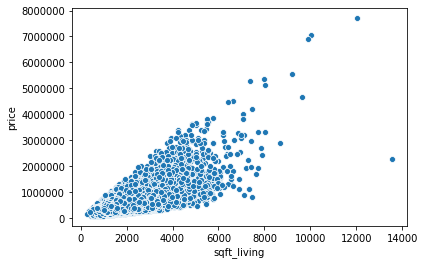

In [13]:
sns.scatterplot(x='sqft_living', y='price', data=house_df)

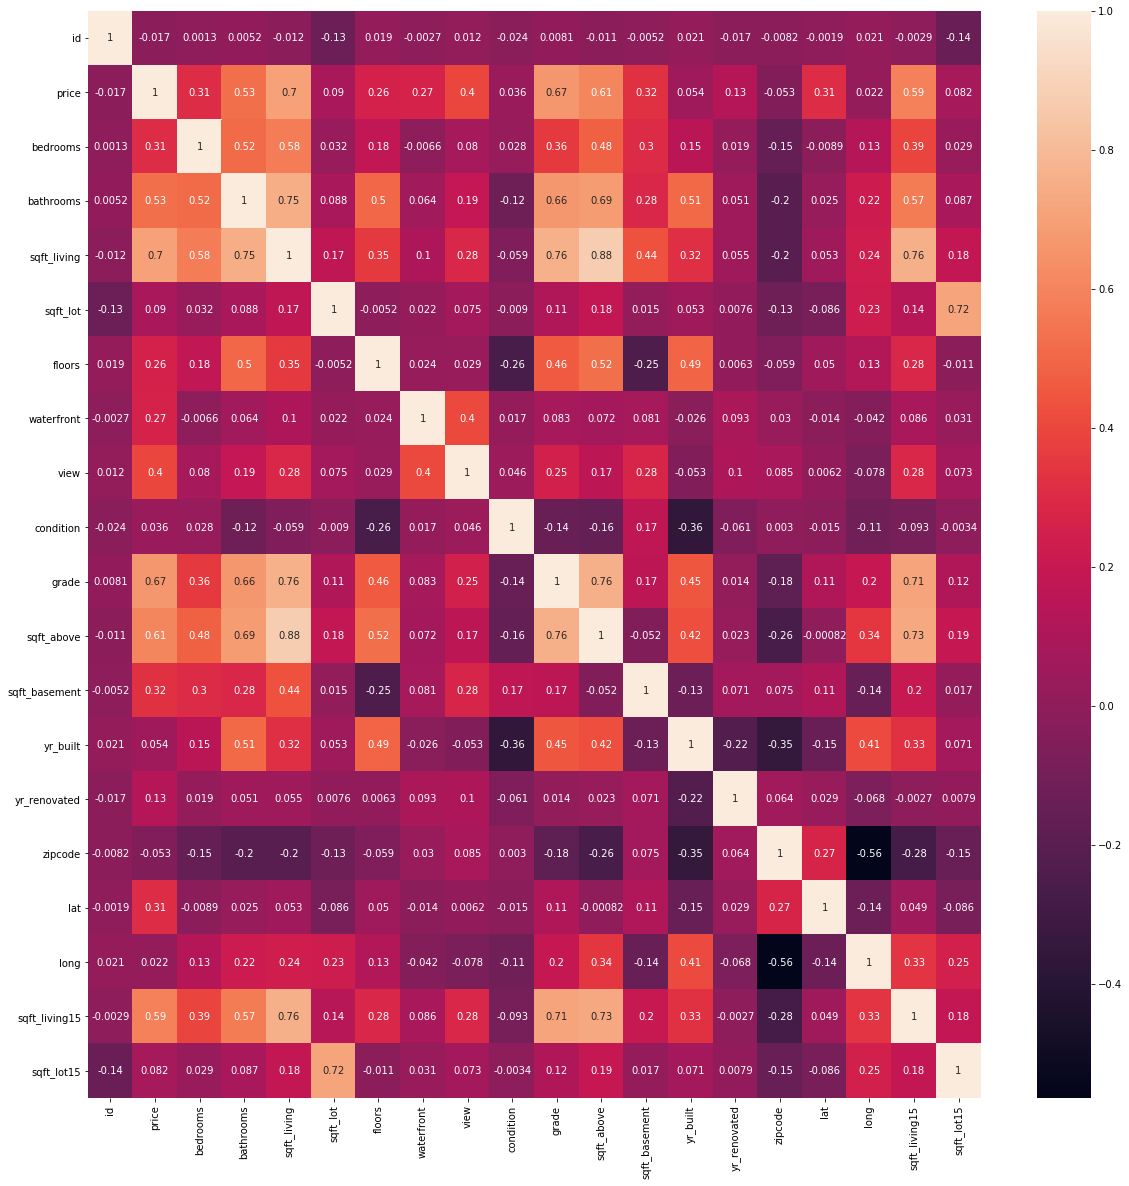

In [20]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot=True);

In [0]:
# O relacionamento da coluna price com as linhas, demonstra a correlação de preço com os outros atributos. A partir de 0.70, mostra-se uma correlação forte

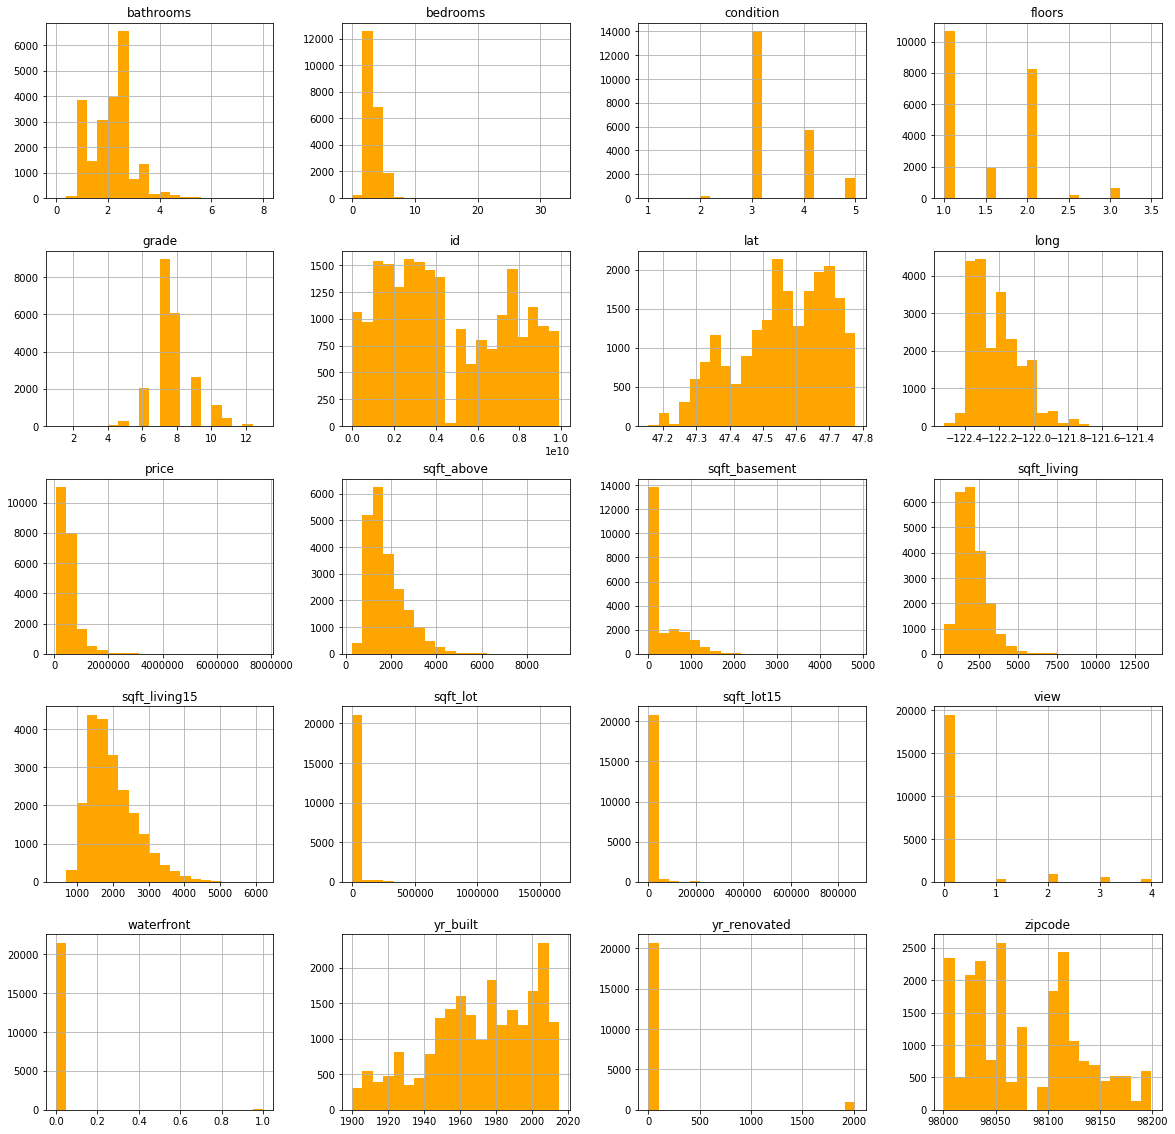

In [33]:
house_df.hist(bins=20, figsize=(20, 20), color = 'Orange');  # Distribuição de frequencia de cada atributo

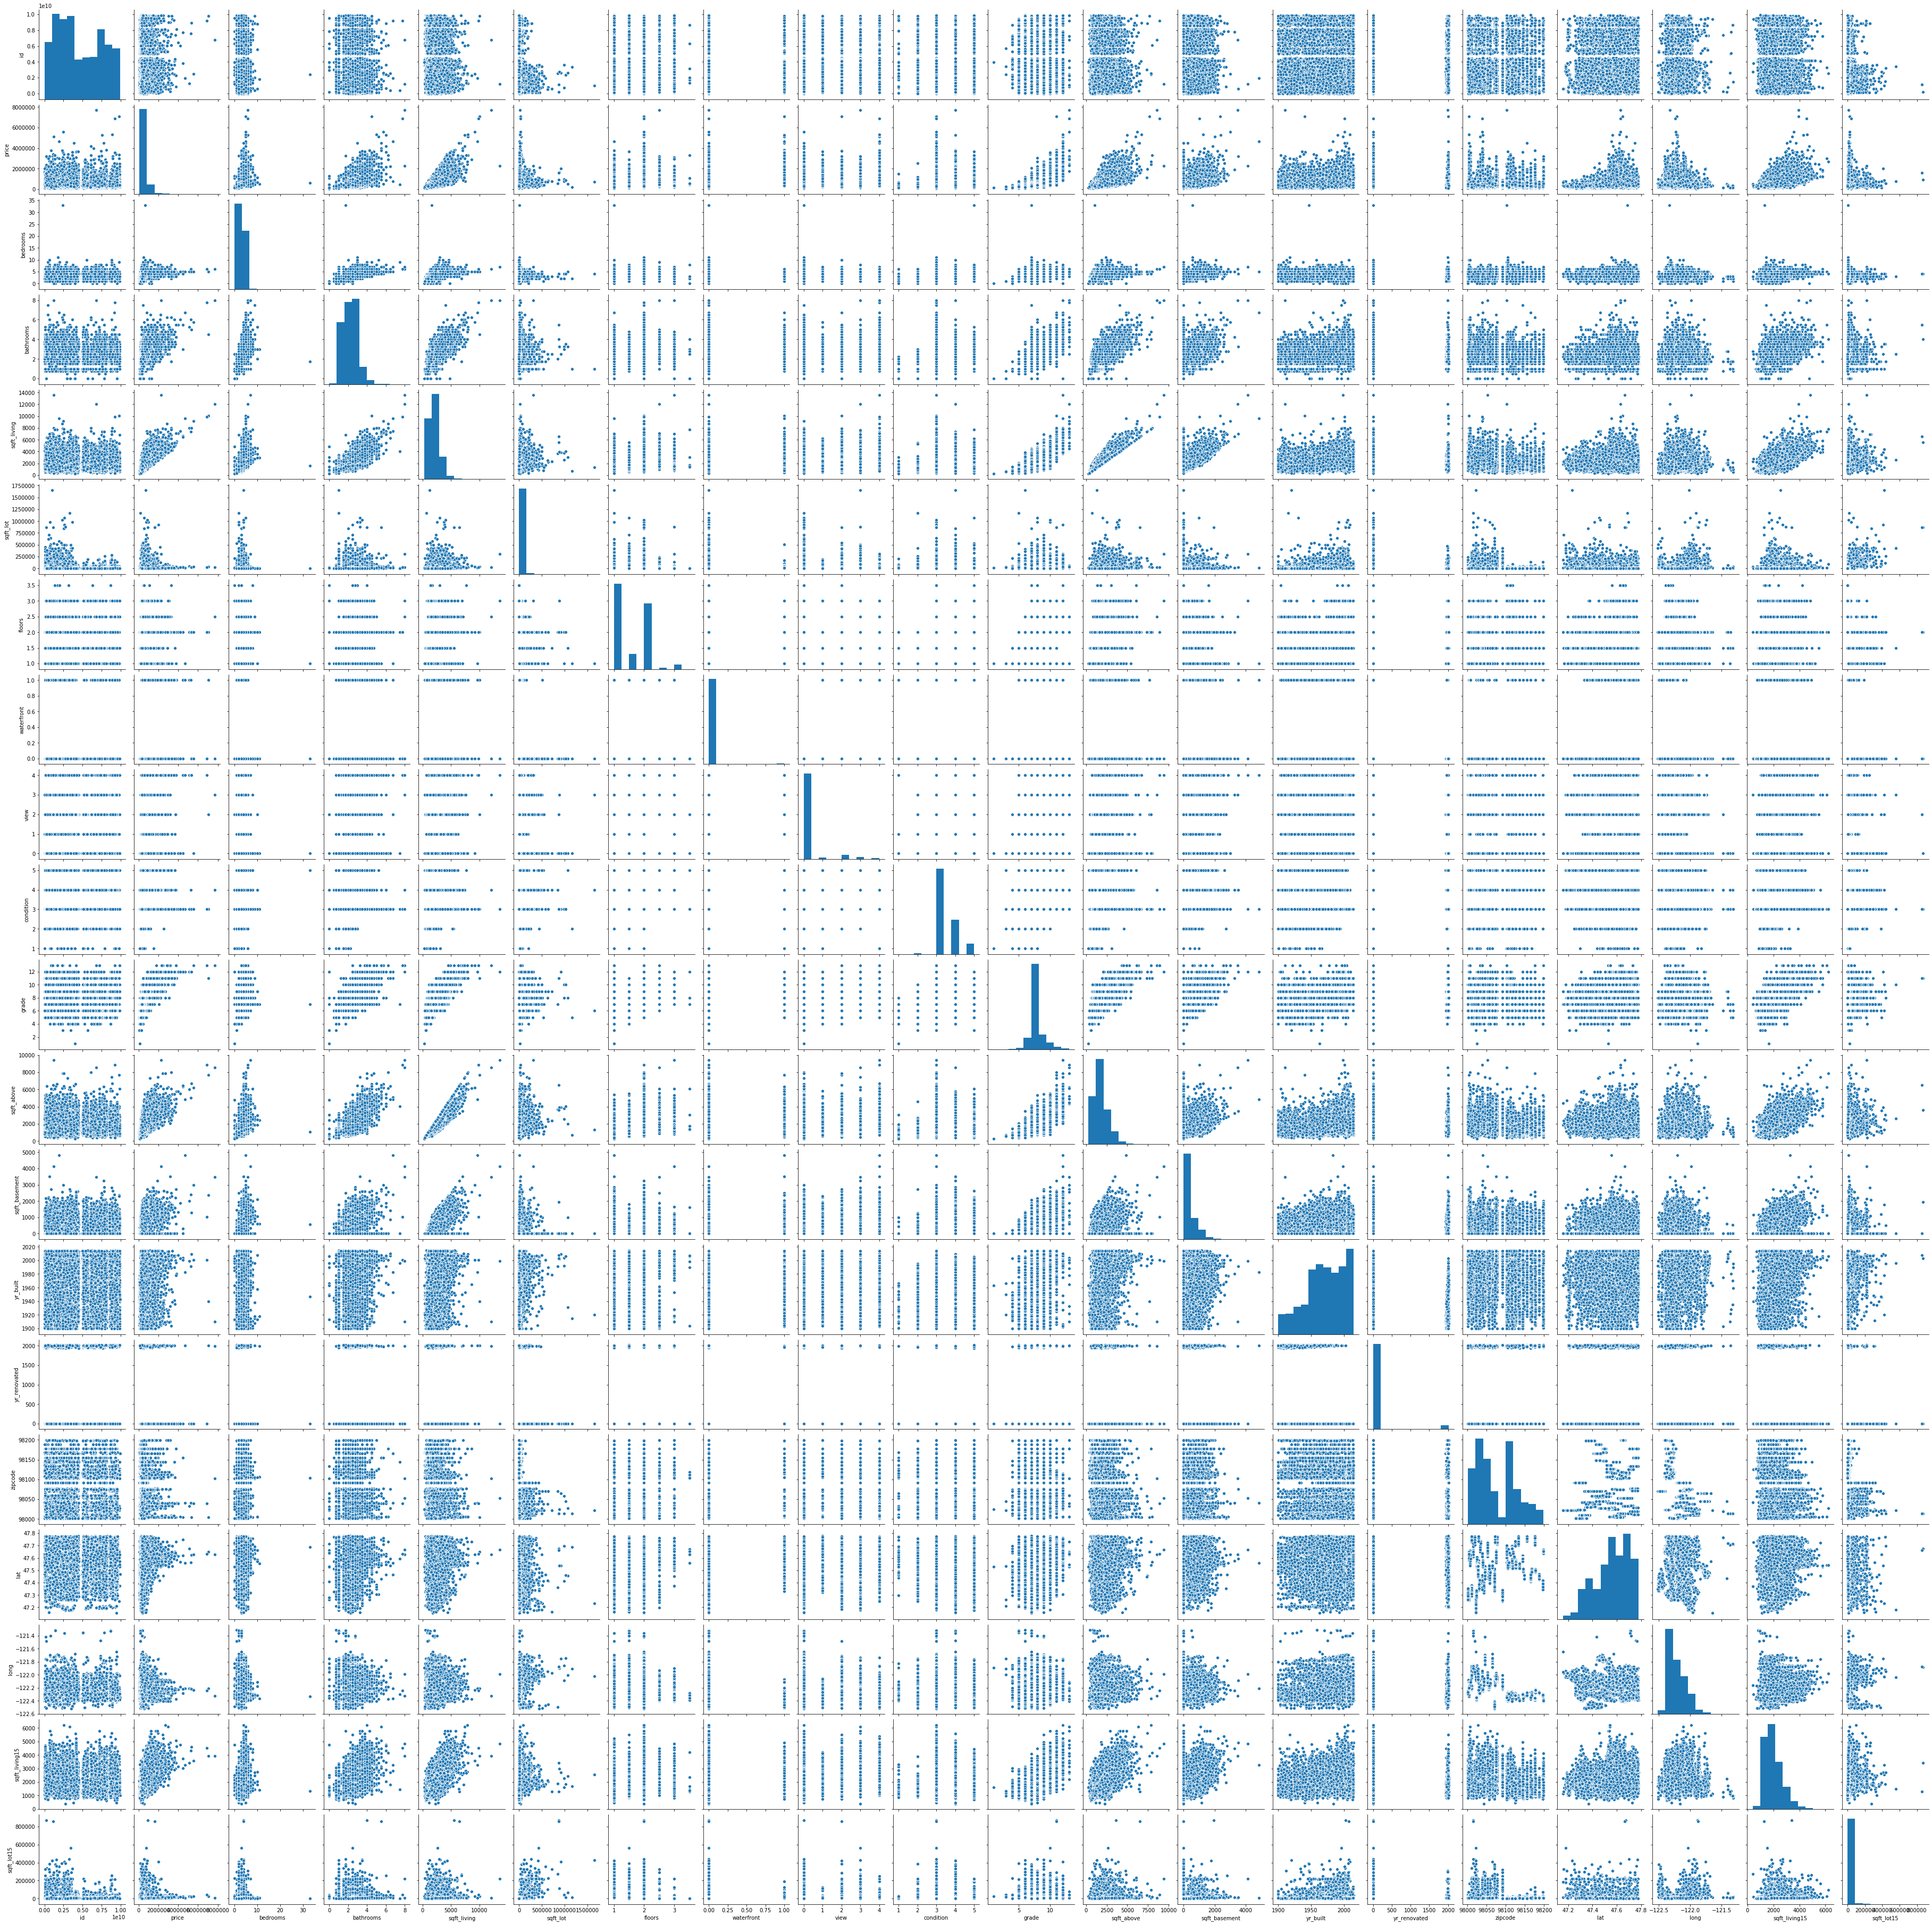

In [34]:
sns.pairplot(data=house_df)

In [0]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [0]:
X = house_df[selected_features]

In [37]:
X.head()

bedrooms  bathrooms  sqft_living  ...  floors  sqft_above  sqft_basement
0         3       1.00         1180  ...     1.0        1180              0
1         3       2.25         2570  ...     2.0        2170            400
2         2       1.00          770  ...     1.0         770              0
3         4       3.00         1960  ...     1.0        1050            910
4         3       2.00         1680  ...     1.0        1680              0

[5 rows x 7 columns]

In [0]:
y = house_df['price']

In [39]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [40]:
X.shape

(21613, 7)

In [41]:
y.shape

(21613,)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [44]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [45]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [0]:
y = y.values.reshape(-1, 1)

In [49]:
y.shape

(21613, 1)

In [0]:
y_scaled = scaler.fit_transform(y)

In [51]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [53]:
X_train.shape  # Tamanho da base para treinamento

(16209, 7)

In [54]:
X_test.shape  # Tamanho da base para teste

(5404, 7)